In [1]:
%load_ext autoreload
%autoreload 2

In [16]:
from torchvision import models
import neuroai_kit as nk
from neuroai_kit import model_utils

In [17]:
model = models.alexnet(weights='DEFAULT')
model

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [18]:
import neuroai_kit as nk
from neuroai_kit import model_utils

layer_names = model_utils.get_layers(model)
layer_names

['features.0',
 'features.1',
 'features.2',
 'features.3',
 'features.4',
 'features.5',
 'features.6',
 'features.7',
 'features.8',
 'features.9',
 'features.10',
 'features.11',
 'features.12',
 'avgpool',
 'classifier.0',
 'classifier.1',
 'classifier.2',
 'classifier.3',
 'classifier.4',
 'classifier.5',
 'classifier.6']

In [5]:
import torch
from neuroai_kit import model_utils

fake_imgs = torch.rand(10,3,224,224) # dummy batch of 10 images
model.eval()
with torch.no_grad():    
    with nk.NeuroElectrodeArray(model, layer_names) as electrode:
        activations = electrode(fake_imgs)
for layer_name, act in activations.items():
    print(layer_name, act.shape)

features.0 torch.Size([10, 64, 55, 55])
features.1 torch.Size([10, 64, 55, 55])
features.2 torch.Size([10, 64, 27, 27])
features.3 torch.Size([10, 192, 27, 27])
features.4 torch.Size([10, 192, 27, 27])
features.5 torch.Size([10, 192, 13, 13])
features.6 torch.Size([10, 384, 13, 13])
features.7 torch.Size([10, 384, 13, 13])
features.8 torch.Size([10, 256, 13, 13])
features.9 torch.Size([10, 256, 13, 13])
features.10 torch.Size([10, 256, 13, 13])
features.11 torch.Size([10, 256, 13, 13])
features.12 torch.Size([10, 256, 6, 6])
avgpool torch.Size([10, 256, 6, 6])
classifier.0 torch.Size([10, 9216])
classifier.1 torch.Size([10, 4096])
classifier.2 torch.Size([10, 4096])
classifier.3 torch.Size([10, 4096])
classifier.4 torch.Size([10, 4096])
classifier.5 torch.Size([10, 4096])
classifier.6 torch.Size([10, 1000])


In [6]:
# or equivalently
activations2 = model_utils.get_activations(model.eval(), fake_imgs, layer_names)
for layer_name, act in activations2.items():
    print(layer_name, act.shape)

features.0 torch.Size([10, 64, 55, 55])
features.1 torch.Size([10, 64, 55, 55])
features.2 torch.Size([10, 64, 27, 27])
features.3 torch.Size([10, 192, 27, 27])
features.4 torch.Size([10, 192, 27, 27])
features.5 torch.Size([10, 192, 13, 13])
features.6 torch.Size([10, 384, 13, 13])
features.7 torch.Size([10, 384, 13, 13])
features.8 torch.Size([10, 256, 13, 13])
features.9 torch.Size([10, 256, 13, 13])
features.10 torch.Size([10, 256, 13, 13])
features.11 torch.Size([10, 256, 13, 13])
features.12 torch.Size([10, 256, 6, 6])
avgpool torch.Size([10, 256, 6, 6])
classifier.0 torch.Size([10, 9216])
classifier.1 torch.Size([10, 4096])
classifier.2 torch.Size([10, 4096])
classifier.3 torch.Size([10, 4096])
classifier.4 torch.Size([10, 4096])
classifier.5 torch.Size([10, 4096])
classifier.6 torch.Size([10, 1000])


In [7]:
# you'll see a warning if you forget to do model.eval
activations3 = model_utils.get_activations(model.train(), fake_imgs, layer_names)
for layer_name, act in activations3.items():
    print(layer_name, act.shape)

features.0 torch.Size([10, 64, 55, 55])
features.1 torch.Size([10, 64, 55, 55])
features.2 torch.Size([10, 64, 27, 27])
features.3 torch.Size([10, 192, 27, 27])
features.4 torch.Size([10, 192, 27, 27])
features.5 torch.Size([10, 192, 13, 13])
features.6 torch.Size([10, 384, 13, 13])
features.7 torch.Size([10, 384, 13, 13])
features.8 torch.Size([10, 256, 13, 13])
features.9 torch.Size([10, 256, 13, 13])
features.10 torch.Size([10, 256, 13, 13])
features.11 torch.Size([10, 256, 13, 13])
features.12 torch.Size([10, 256, 6, 6])
avgpool torch.Size([10, 256, 6, 6])
classifier.0 torch.Size([10, 9216])
classifier.1 torch.Size([10, 4096])
classifier.2 torch.Size([10, 4096])
classifier.3 torch.Size([10, 4096])
classifier.4 torch.Size([10, 4096])
classifier.5 torch.Size([10, 4096])
classifier.6 torch.Size([10, 1000])


/teamspace/studios/this_studio/neuroai-kit/neuroai_kit/electrode.py:119: UserWarning: Warning, you are running your model in 'train' mode. You should probably use model.eval()
  warnings.warn("Warning, you are running your model in 'train' mode. You should probably use model.eval()")


# How about for an actual image?

In [10]:
import torch
from torchvision import transforms
from neuroai_kit import image_utils

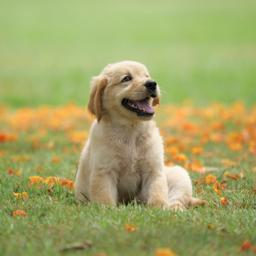

In [11]:
img1 = image_utils.open_image('https://s3.us-east-1.wasabisys.com/visionlab-datasets/public/dog256.jpg')
img1

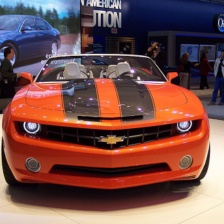

In [12]:
img2 = image_utils.open_image('https://s3.us-east-1.wasabisys.com/visionlab-datasets/public/car.jpg')
img2

In [13]:
# transform for use with the model
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(), # changes from HxWx3 [0,255] to 3xHxW [0,1]
    transforms.Normalize(mean=image_utils.IMAGENET_MEAN, std=image_utils.IMAGENET_STD) # z-scores pixels using stats from ImageNet
])
transform

Compose(
    Resize(size=256, interpolation=bilinear, max_size=None, antialias=True)
    CenterCrop(size=(224, 224))
    ToTensor()
    Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
)

In [14]:
transform(img1)

tensor([[[ 0.7762,  0.7762,  0.7762,  ...,  0.5364,  0.5364,  0.5707],
         [ 0.7762,  0.7762,  0.7762,  ...,  0.5364,  0.5364,  0.5364],
         [ 0.7762,  0.7762,  0.7762,  ...,  0.5364,  0.5364,  0.5364],
         ...,
         [ 0.3652,  0.3138,  0.2624,  ..., -0.2171, -0.1486, -0.1143],
         [ 0.3652,  0.2796,  0.2282,  ..., -0.2171, -0.1486, -0.1143],
         [ 0.2796,  0.1939,  0.1768,  ..., -0.1828, -0.2171, -0.2171]],

        [[ 1.3957,  1.3957,  1.3957,  ...,  1.2206,  1.2206,  1.2031],
         [ 1.3957,  1.3957,  1.3957,  ...,  1.2206,  1.2206,  1.2206],
         [ 1.3957,  1.3957,  1.3957,  ...,  1.2206,  1.2206,  1.2206],
         ...,
         [ 0.5903,  0.5028,  0.4853,  ...,  0.0301,  0.1001,  0.1352],
         [ 0.5903,  0.4678,  0.4503,  ...,  0.0301,  0.1001,  0.1352],
         [ 0.5028,  0.3803,  0.3627,  ...,  0.0651,  0.0301, -0.0224]],

        [[ 0.4439,  0.4439,  0.4439,  ...,  0.0779,  0.1128,  0.0779],
         [ 0.4439,  0.4439,  0.4439,  ...,  0

In [15]:
img_list = [img1, img2]
img_batch = torch.stack([transform(img) for img in img_list])
img_batch.shape # 2 images, 3 channels (red, green, blue), 224x224 pixels

torch.Size([2, 3, 224, 224])

In [20]:
activations = model_utils.get_activations(model.eval(), img_batch, layer_names)
for layer_name, act in activations.items():
    print(layer_name, act.shape)

features.0 torch.Size([2, 64, 55, 55])
features.1 torch.Size([2, 64, 55, 55])
features.2 torch.Size([2, 64, 27, 27])
features.3 torch.Size([2, 192, 27, 27])
features.4 torch.Size([2, 192, 27, 27])
features.5 torch.Size([2, 192, 13, 13])
features.6 torch.Size([2, 384, 13, 13])
features.7 torch.Size([2, 384, 13, 13])
features.8 torch.Size([2, 256, 13, 13])
features.9 torch.Size([2, 256, 13, 13])
features.10 torch.Size([2, 256, 13, 13])
features.11 torch.Size([2, 256, 13, 13])
features.12 torch.Size([2, 256, 6, 6])
avgpool torch.Size([2, 256, 6, 6])
classifier.0 torch.Size([2, 9216])
classifier.1 torch.Size([2, 4096])
classifier.2 torch.Size([2, 4096])
classifier.3 torch.Size([2, 4096])
classifier.4 torch.Size([2, 4096])
classifier.5 torch.Size([2, 4096])
classifier.6 torch.Size([2, 1000])
